In [30]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Plots!
plt.rcParams.update({'font.size': 8}) #Change font size


This Data Frame comes from the advanced game log for the WSU Cougars 2023 - 2024 mens basketball season. The link to the table can be found here: https://www.sports-reference.com/cbb/schools/washington-state/men/2024-gamelogs-advanced.html

In [3]:
#import csv into a pandas dataframe
BBall = pd.DataFrame(pd.read_csv('./Game_Stats.csv'))
BBall.head

<bound method NDFrame.head of     Game_Number        Date Location            Opponent       W_L  \
0             1   11/6/2023      NaN               Idaho         W   
1             2  11/10/2023      NaN        Prairie View         W   
2             3  11/18/2023        N   Mississippi State         L   
3             4  11/19/2023        N        Rhode Island         W   
4             5  11/24/2023      NaN           Utah Tech         W   
5             6  11/27/2023      NaN  Eastern Washington         W   
6             7   12/2/2023      NaN      Portland State         W   
7             8   12/6/2023      NaN        UC-Riverside         W   
8             9  12/10/2023      NaN           Grambling         W   
9            10  12/16/2023        N         Santa Clara         L   
10           11  12/21/2023        N         Boise State         W   
11           12  12/29/2023        @                Utah         L   
12           13  12/31/2023        @            Colorado    

Inspection and Cleaning

In [4]:
#quick look at the data to get a feel for the columns
BBall.head

<bound method NDFrame.head of     Game_Number        Date Location            Opponent       W_L  \
0             1   11/6/2023      NaN               Idaho         W   
1             2  11/10/2023      NaN        Prairie View         W   
2             3  11/18/2023        N   Mississippi State         L   
3             4  11/19/2023        N        Rhode Island         W   
4             5  11/24/2023      NaN           Utah Tech         W   
5             6  11/27/2023      NaN  Eastern Washington         W   
6             7   12/2/2023      NaN      Portland State         W   
7             8   12/6/2023      NaN        UC-Riverside         W   
8             9  12/10/2023      NaN           Grambling         W   
9            10  12/16/2023        N         Santa Clara         L   
10           11  12/21/2023        N         Boise State         W   
11           12  12/29/2023        @                Utah         L   
12           13  12/31/2023        @            Colorado    

In [5]:
#Rows and columns
BBall.shape

(31, 39)

In [6]:
#More Data Info
BBall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Game_Number  31 non-null     int64  
 1   Date         31 non-null     object 
 2   Location     14 non-null     object 
 3   Opponent     31 non-null     object 
 4   W_L          31 non-null     object 
 5   Coug_Score   30 non-null     float64
 6   Opp_Score    30 non-null     float64
 7   Coug_FG      30 non-null     float64
 8   Coug_FGA     30 non-null     float64
 9   Coug_FG_per  30 non-null     float64
 10  Coug_3P      30 non-null     float64
 11  Coug_3PA     30 non-null     float64
 12  Coug_3P_per  30 non-null     float64
 13  Coug_FT      30 non-null     float64
 14  Coug_FTA     30 non-null     float64
 15  Coug_FT_per  30 non-null     float64
 16  Coug_ORB     30 non-null     float64
 17  Coug_TRB     30 non-null     float64
 18  Coug_AST     30 non-null     float64
 19  Coug_STL  

In [7]:
#generate descriptive stats
BBall.describe()

,Game_Number,Coug_Score,Opp_Score,Coug_FG,Coug_FGA,Coug_FG_per,Coug_3P,Coug_3PA,Coug_3P_per,Coug_FT,...,Opp_FT,Opp_FTA,Opp_FT_per,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
count,31.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,16.000000,75.100000,67.100000,27.466667,58.533333,0.470167,6.533333,18.533333,0.348867,13.633333,...,13.933333,18.666667,0.747833,7.033333,28.300000,10.466667,5.466667,2.833333,9.900000,17.433333
std,9.092121,9.653836,9.865824,4.882999,7.094113,0.063690,2.687562,4.049124,0.109200,4.452689,...,4.330592,5.591455,0.108027,3.274597,5.778378,3.971739,2.208656,1.703613,3.437621,3.147887
min,1.000000,58.000000,49.000000,19.000000,40.000000,0.313000,2.000000,11.000000,0.167000,6.000000,...,3.000000,7.000000,0.429000,2.000000,19.000000,4.000000,1.000000,0.000000,3.000000,13.000000
25%,8.500000,66.250000,59.000000,24.000000,55.000000,0.429000,5.000000,15.250000,0.289500,10.000000,...,10.250000,14.000000,0.695500,5.000000,24.250000,8.000000,4.250000,2.000000,8.000000,14.250000
50%,16.000000,76.000000,65.000000,27.500000,57.500000,0.473500,6.500000,18.000000,0.333000,13.000000,...,14.500000,20.500000,0.776000,6.000000,27.000000,11.000000,5.000000,2.500000,9.500000,18.000000
75%,23.500000,83.000000,73.750000,30.750000,62.000000,0.514250,7.750000,20.000000,0.397750,16.000000,...,17.000000,22.750000,0.818000,9.000000,32.750000,12.750000,6.750000,4.000000,11.750000,20.000000
max,31.000000,93.000000,89.000000,38.000000,75.000000,0.564000,15.000000,26.000000,0.652000,24.000000,...,22.000000,27.000000,0.909000,19.000000,42.000000,22.000000,11.000000,9.000000,17.000000,24.000000


First Quick Quality of Life Cleaning I would like to do before getting into fixing all of the NaN and Null values is fixing the location column. Currently the way it is formatted is a bit confusing. Because it was in table form, you are supposed to read across the row to figure out what its saying for instance if it was an away game you would read the @ symbol in its own column then the opponent schools name to see where it was (i.e. @ colorado). Additionally if the game was held at a neutral venue it was just labeled as N in that column. Finally, if the space was left blank, now a pesky NaN value we have to deal with, it was a home game. I would like to completely delete this system and move to a categorization of Home, Away, and Neutral. This means all NaN Values are now Home values, all @ should become Away and the N's get lengthened to read Neutral Venue.

In [8]:
#Fix the Location Column
BBall.Location = BBall.Location.fillna('Home')
BBall.Location = BBall.Location.str.replace('@', 'Away')
BBall.Location = BBall.Location.str.replace('N', 'Neutral Venue')
BBall.Location #There Much Better!
#Dont run this twice... it will cause Neutral Venue to be Neutral VenNeutral Venue... oops

0              Home
1              Home
2     Neutral Venue
3     Neutral Venue
4              Home
5              Home
6              Home
7              Home
8              Home
9     Neutral Venue
10    Neutral Venue
11             Away
12             Away
13             Home
14             Home
15             Away
16             Home
17             Away
18             Away
19             Home
20             Home
21             Away
22             Away
23             Away
24             Home
25             Home
26             Away
27             Away
28             Home
29             Home
30             Home
Name: Location, dtype: object

In [9]:
#More Cleaning
# Code for column-wise null count here
null_value_count = BBall.isnull().sum()
null_value_count

Game_Number    0
Date           0
Location       0
Opponent       0
W_L            0
Coug_Score     1
Opp_Score      1
Coug_FG        1
Coug_FGA       1
Coug_FG_per    1
Coug_3P        1
Coug_3PA       1
Coug_3P_per    1
Coug_FT        1
Coug_FTA       1
Coug_FT_per    1
Coug_ORB       1
Coug_TRB       1
Coug_AST       1
Coug_STL       1
Coug_BLK       1
Coug_TOV       1
Coug_PF        1
Opp_FG         1
Opp_FGA        1
Opp_FG_per     1
Opp_3P         1
Opp_3PA        1
Opp_3P_per     1
Opp_FT         1
Opp_FTA        1
Opp_FT_per     1
Opp_ORB        1
Opp_TRB        1
Opp_AST        1
Opp_STL        1
Opp_BLK        1
Opp_TOV        1
Opp_PF         1
dtype: int64

I know from this point that the Missing/null values are because of a game scheduled in the future that hasn't been played yet so I can just drop the row with Null values as it doesn't have any useful data for this analysis.

In [10]:
#Drop Rows with more than 3 Null or Missing Values
BBall = BBall.dropna(thresh=BBall.shape[1] - 1)

In [11]:
#Duplicate Value Count
len(BBall) - len(BBall.drop_duplicates())

0

In [12]:
#Create New Dataframes & Columns
BBall = BBall.assign(Score_Diff = lambda x: x.Coug_Score - x.Opp_Score) #Create a new column to hold the score difference.
wins = BBall[BBall.W_L == 'W'] #separate games into two new dataframes for wins and losses
losses = BBall[BBall.W_L == 'L']

In [13]:
#Lets look at the 5 highest scoring games
Top5_Scoring_Games = BBall.sort_values(by = 'Coug_Score', ascending = False).head(5)
Top5_Scoring_Games

,Game_Number,Date,Location,Opponent,W_L,Coug_Score,Opp_Score,Coug_FG,Coug_FGA,Coug_FG_per,...,Opp_FTA,Opp_FT_per,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,Score_Diff
4,5,11/24/2023,Home,Utah Tech,W,93.0,53.0,32.0,57.0,0.561,...,17.0,0.706,9.0,27.0,7.0,5.0,4.0,16.0,20.0,40.0
21,22,2/3/2024,Away,Washington,W (1 OT),90.0,87.0,38.0,75.0,0.507,...,23.0,0.739,5.0,27.0,15.0,1.0,2.0,9.0,14.0,3.0
17,18,1/18/2024,Away,Stanford,W,89.0,75.0,38.0,70.0,0.543,...,15.0,0.867,2.0,23.0,14.0,4.0,3.0,17.0,13.0,14.0
7,8,12/6/2023,Home,UC-Riverside,W,86.0,49.0,35.0,71.0,0.493,...,21.0,0.810,8.0,24.0,8.0,4.0,3.0,14.0,13.0,37.0
0,1,11/6/2023,Home,Idaho,W,84.0,59.0,31.0,57.0,0.544,...,25.0,0.720,5.0,23.0,8.0,6.0,4.0,11.0,23.0,25.0


In [14]:
#How about the top 5 games but looking at score difference instead?
Top5_blowouts = wins.sort_values(by = 'Score_Diff', ascending = False).head(5)
Top5_blowouts

,Game_Number,Date,Location,Opponent,W_L,Coug_Score,Opp_Score,Coug_FG,Coug_FGA,Coug_FG_per,...,Opp_FTA,Opp_FT_per,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,Score_Diff
4,5,11/24/2023,Home,Utah Tech,W,93.0,53.0,32.0,57.0,0.561,...,17.0,0.706,9.0,27.0,7.0,5.0,4.0,16.0,20.0,40.0
7,8,12/6/2023,Home,UC-Riverside,W,86.0,49.0,35.0,71.0,0.493,...,21.0,0.810,8.0,24.0,8.0,4.0,3.0,14.0,13.0,37.0
0,1,11/6/2023,Home,Idaho,W,84.0,59.0,31.0,57.0,0.544,...,25.0,0.720,5.0,23.0,8.0,6.0,4.0,11.0,23.0,25.0
19,20,1/24/2024,Home,Utah,W,79.0,57.0,28.0,59.0,0.475,...,7.0,0.429,9.0,27.0,11.0,3.0,5.0,10.0,20.0,22.0
3,4,11/19/2023,Neutral Venue,Rhode Island,W,78.0,57.0,33.0,64.0,0.516,...,12.0,0.833,4.0,23.0,9.0,1.0,2.0,11.0,18.0,21.0


In [15]:
#Lets look at the 5 lowest scoring games
Bottom5_Scoring_Games = BBall.sort_values(by = 'Coug_Score', ascending = True).head(5)
Bottom5_Scoring_Games

,Game_Number,Date,Location,Opponent,W_L,Coug_Score,Opp_Score,Coug_FG,Coug_FGA,Coug_FG_per,...,Opp_FTA,Opp_FT_per,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,Score_Diff
11,12,12/29/2023,Away,Utah,L,58.0,80.0,21.0,67.0,0.313,...,21.0,0.714,5.0,34.0,22.0,6.0,9.0,5.0,18.0,-22.0
9,10,12/16/2023,Neutral Venue,Santa Clara,L,61.0,69.0,22.0,66.0,0.333,...,20.0,0.850,4.0,28.0,7.0,5.0,2.0,9.0,16.0,-8.0
27,28,2/24/2024,Away,Arizona State,L,61.0,73.0,24.0,61.0,0.393,...,11.0,0.818,11.0,35.0,11.0,6.0,3.0,10.0,13.0,-12.0
23,24,2/10/2024,Away,Oregon,W,62.0,56.0,21.0,49.0,0.429,...,14.0,0.571,10.0,31.0,9.0,8.0,3.0,9.0,18.0,6.0
2,3,11/18/2023,Neutral Venue,Mississippi State,L,64.0,76.0,24.0,59.0,0.407,...,25.0,0.840,5.0,33.0,7.0,10.0,2.0,8.0,13.0,-12.0


In [16]:
#And our worst losses.
Bottom5_blowouts = losses.sort_values(by = 'Score_Diff', ascending = True).head(5)
Bottom5_blowouts

,Game_Number,Date,Location,Opponent,W_L,Coug_Score,Opp_Score,Coug_FG,Coug_FGA,Coug_FG_per,...,Opp_FTA,Opp_FT_per,Opp_ORB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF,Score_Diff
11,12,12/29/2023,Away,Utah,L,58.0,80.0,21.0,67.0,0.313,...,21.0,0.714,5.0,34.0,22.0,6.0,9.0,5.0,18.0,-22.0
2,3,11/18/2023,Neutral Venue,Mississippi State,L,64.0,76.0,24.0,59.0,0.407,...,25.0,0.840,5.0,33.0,7.0,10.0,2.0,8.0,13.0,-12.0
27,28,2/24/2024,Away,Arizona State,L,61.0,73.0,24.0,61.0,0.393,...,11.0,0.818,11.0,35.0,11.0,6.0,3.0,10.0,13.0,-12.0
9,10,12/16/2023,Neutral Venue,Santa Clara,L,61.0,69.0,22.0,66.0,0.333,...,20.0,0.850,4.0,28.0,7.0,5.0,2.0,9.0,16.0,-8.0
12,13,12/31/2023,Away,Colorado,L,67.0,74.0,28.0,58.0,0.483,...,26.0,0.846,5.0,26.0,12.0,4.0,2.0,12.0,13.0,-7.0


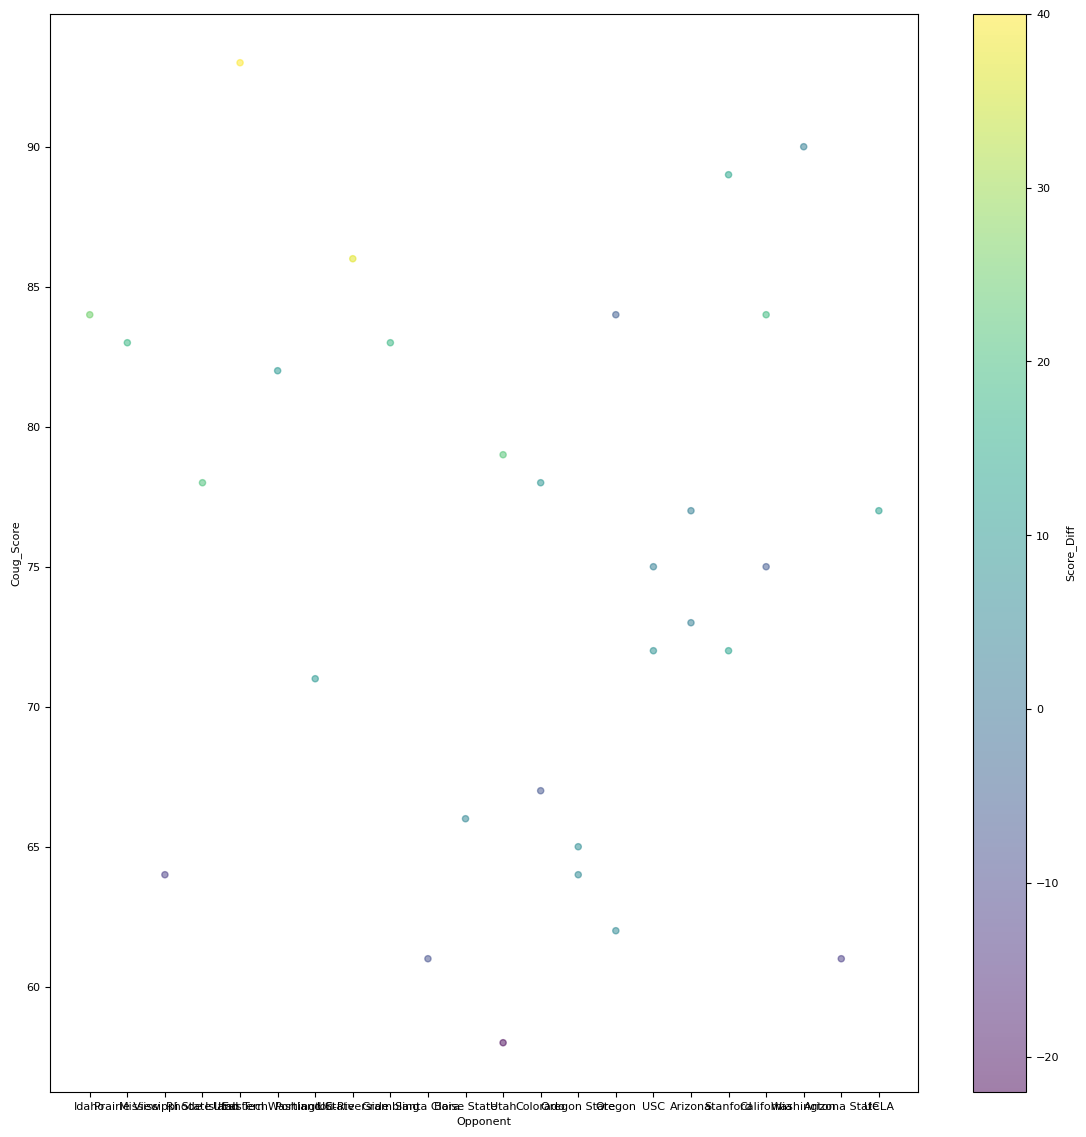

In [31]:
BBall.plot.area(y = ['Coug'])
plt.show()